<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Mathis Loevenich
* Date:   02.11.2022
* Matr. No.: 11157363 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [2]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

94

In [3]:
heights_and_weights = (
    pd.read_csv("data/SOCR-HeightWeight.csv")
).rename(
    columns={
        'Height(Inches)': 'height', 
        'Weight(Pounds)': 'weight'
    }
)

In [4]:
penguins = sns.load_dataset("penguins")

In [13]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator # installed with pip into anaconda env

In [34]:
def calc_eps(data, minPts=2):
    nbrs = NearestNeighbors(n_neighbors=minPts).fit(data)
    n_samples = minPts
    distances, indices = nbrs.kneighbors(data)
    distance_desc = sorted(distances[:,n_samples-1], reverse=True)
    # plt.plot(distance_desc)
    kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure
    # kneedle.plot_knee_normalized()
    return(kneedle.knee_y)
    

In [35]:
calc_eps(np.array(heights_and_weights.height).reshape(-1,1))

0.006339999999994461

Number of clusters: 86


<AxesSubplot:ylabel='height'>

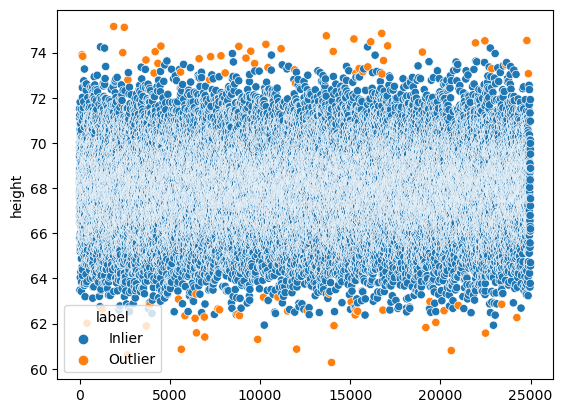

In [102]:
# Outliers for Human Height

# hyperparameters
data = np.array(heights_and_weights.height).reshape(-1,1)
minPts = 2
eps = calc_eps(data, minPts)

# based on the link above: instead of DBSCAN use OPTICS
outlier_detection = DBSCAN(min_samples = minPts, eps= eps)
clusters = outlier_detection.fit_predict(data)

print("Number of clusters:", list(clusters).count(-1))

labeled_df = pd.concat([heights_and_weights.height, pd.Series(clusters.tolist(), name="label")], axis=1)
labeled_df.label.where(labeled_df.label < 0, 1, inplace=True)
labeled_df.replace(-1, "Outlier", inplace=True)
labeled_df.replace(1, "Inlier", inplace=True)
sns.scatterplot(data=labeled_df, x=labeled_df.index, y="height", hue="label")

Number of clusters: 4


<AxesSubplot:ylabel='weight'>

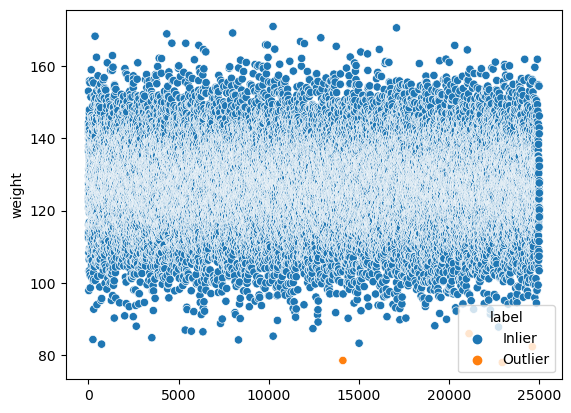

In [111]:
# Outliers for Human weight

# hyperparameters
data = np.array(heights_and_weights.weight).reshape(-1, 1)
minPts = 2
eps = calc_eps(data, minPts)

outlier_detection = DBSCAN(min_samples = minPts)
clusters = outlier_detection.fit_predict(data)


print("Number of clusters:", list(clusters).count(-1))

labeled_df = pd.concat([heights_and_weights.weight, pd.Series(clusters.tolist(), name="label")], axis=1)
labeled_df.label.where(labeled_df.label < 0, 1, inplace=True)
labeled_df.replace(-1, "Outlier", inplace=True)
labeled_df.replace(1, "Inlier", inplace=True)
sns.scatterplot(data=labeled_df, x=labeled_df.index, y="weight", hue="label")

Number of clusters: 7


<AxesSubplot:ylabel='flipper_length_mm'>

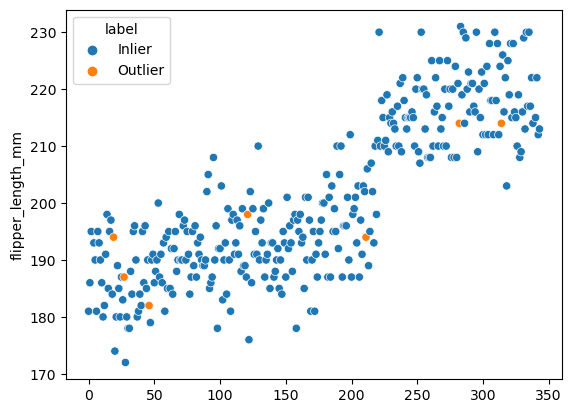

In [112]:
# Outliers for Penguin flipper length

# hyperparameters
data = np.array(penguins.flipper_length_mm.dropna()).reshape(-1, 1) # dropna first
minPts = 2
eps = calc_eps(data, minPts)

outlier_detection = DBSCAN(min_samples = minPts)
clusters = outlier_detection.fit_predict(data)

print("Number of clusters:", list(clusters).count(-1))

labeled_df = pd.concat([penguins.flipper_length_mm.dropna(), pd.Series(clusters.tolist(), name="label")], axis=1)
labeled_df.label.where(labeled_df.label < 0, 1, inplace=True)
labeled_df.replace(-1, "Outlier", inplace=True)
labeled_df.replace(1, "Inlier", inplace=True)
sns.scatterplot(data=labeled_df, x=labeled_df.index, y="flipper_length_mm", hue="label")

Strange is, that even with choosing the **minPts** and **eps** according to the refence above DBSCAN finds the most outliers for Human Height, only 4 outliers for Human Weight and only 7 outliers for Flipper length.

It would be assumable that there should be more outliers also for human weight, as the boxplot from Ex2. suggested so.